## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import warnings
warnings.filterwarnings("ignore")
import re

C:\Users\GM\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Dataset

In [2]:
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Understanding and examining the dataset 

In [4]:
train.shape

(100000, 28)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

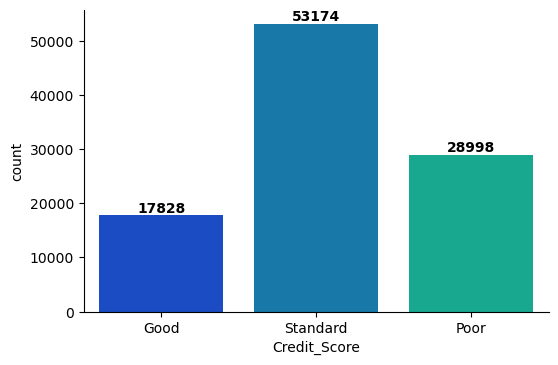

In [7]:
plt.figure(dpi=100)
cs = sns.countplot(x='Credit_Score', data=train, palette='winter')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for container in cs.containers:
    cs.bar_label(container, fontsize=10, fontweight='bold')
plt.show()    

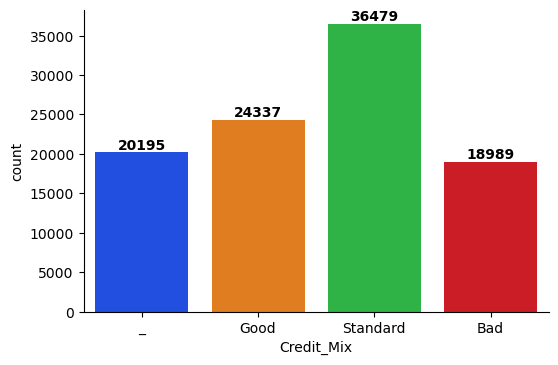

In [8]:
plt.figure(dpi=100)
cm = sns.countplot(x='Credit_Mix', data=train, palette='bright')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for container in cm.containers:
    cm.bar_label(container, fontsize=10, fontweight='bold')
plt.show()  

### Correlation

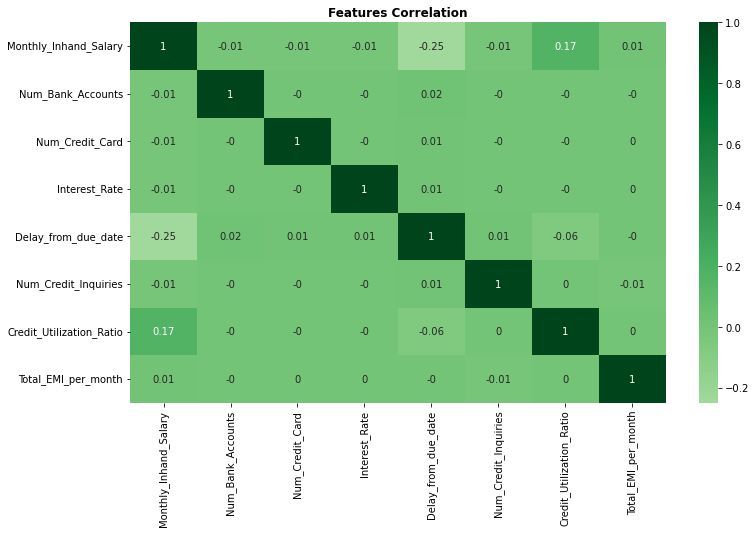

In [9]:
plt.figure(figsize=(12,7))
train_num = train.select_dtypes('number')
sns.heatmap(np.round(train_num.corr(),2), cmap='Greens', center=0, annot=True)
plt.title("Features Correlation", fontweight='bold')
plt.show()

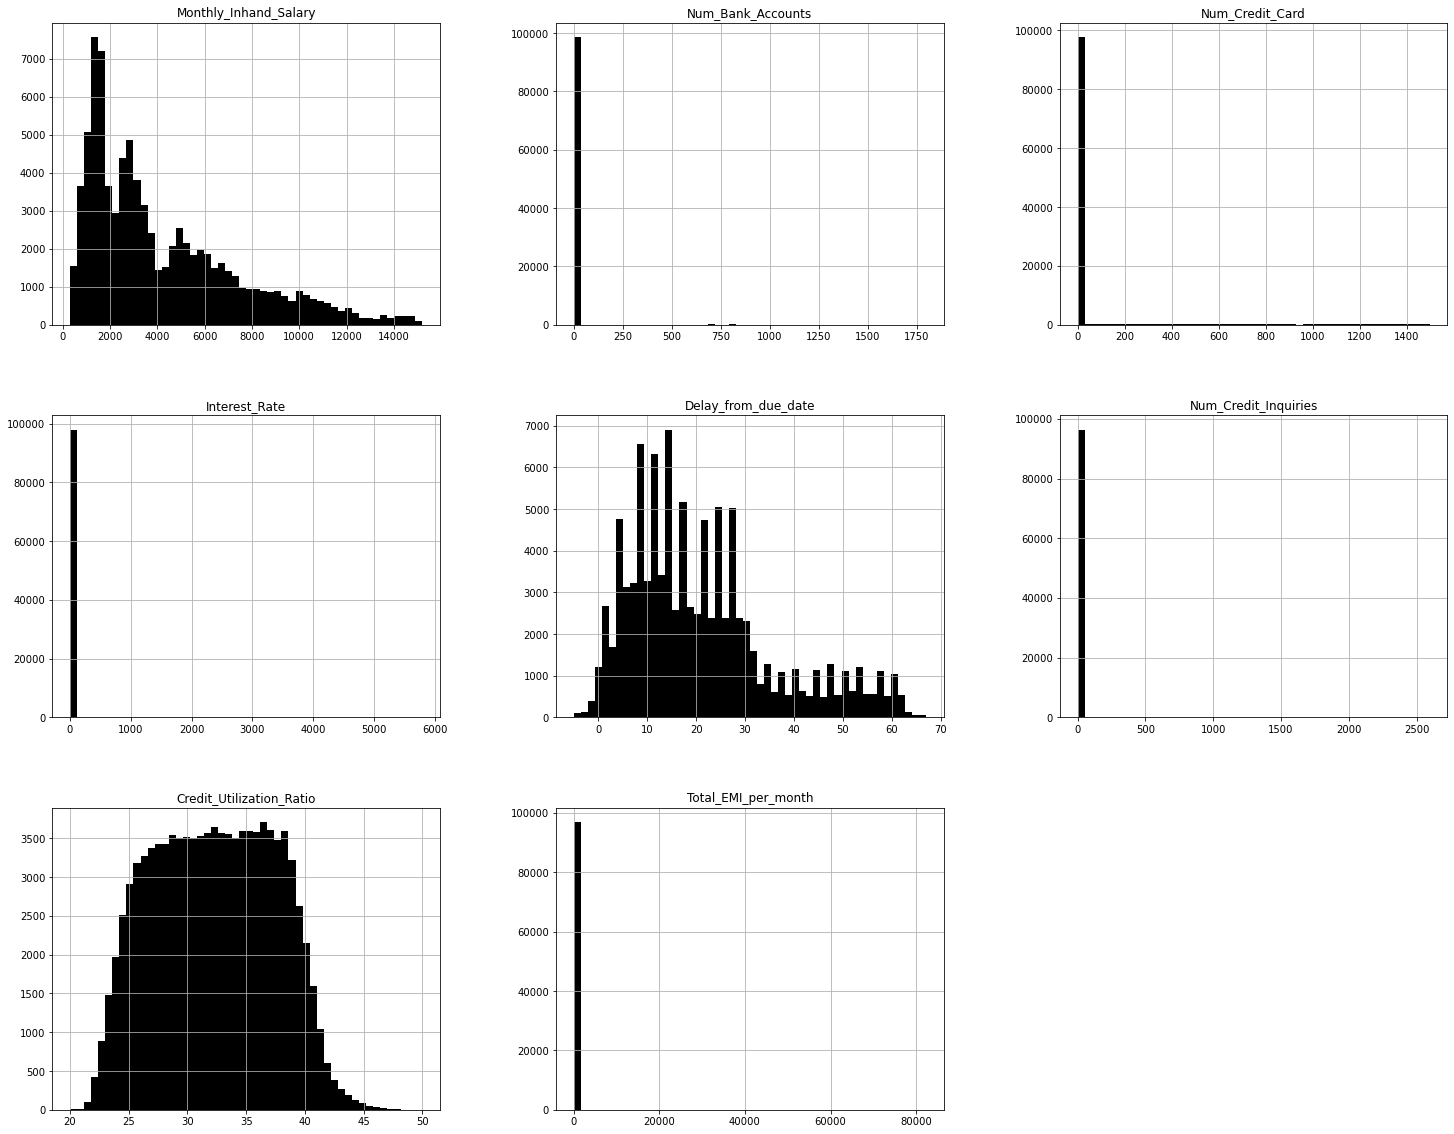

In [10]:
%matplotlib inline
train.hist(bins=50, figsize=(25,20), color='k')
plt.show()

## Feature Engineering

In [11]:
train.columns = [x.lower() for x in train.columns]

In [12]:
train.duplicated().sum()

0

### Data Cleaning

In [13]:
train = train[train.delay_from_due_date >= 0]
train = train[train.num_bank_accounts >= 0]

##### Skewness and Kurtosis of Features

Skewness of monthly_inhand_salary: 1.1297108607919126
Kurtosis of monthly_inhand_salary: 0.6247005119590794


posx and posy should be finite values
posx and posy should be finite values


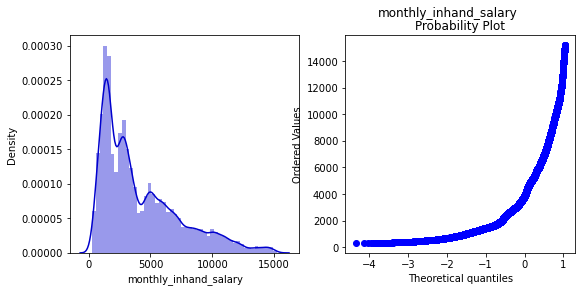

Skewness of num_bank_accounts: 11.203154969101302
Kurtosis of num_bank_accounts: 132.54303640103976


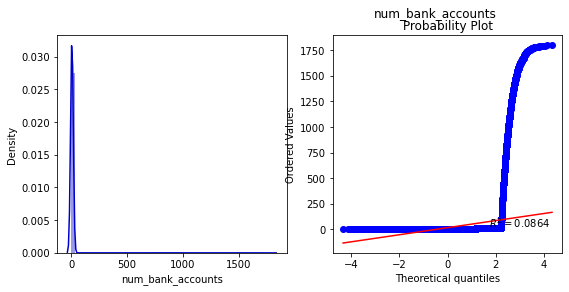

Skewness of num_credit_card: 8.461639049589559
Kurtosis of num_credit_card: 74.59934574253393


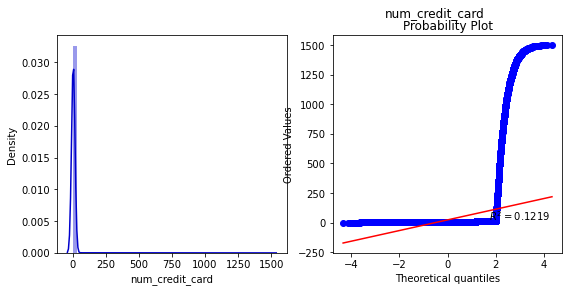

Skewness of interest_rate: 9.0069520313847
Kurtosis of interest_rate: 85.20332631801504


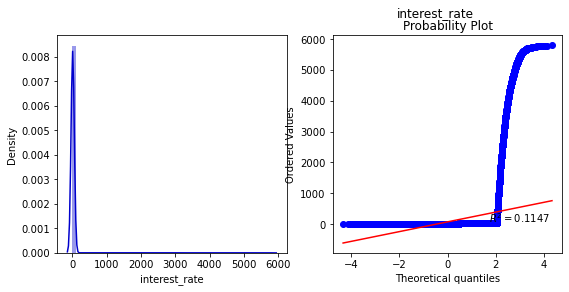

Skewness of delay_from_due_date: 0.9802816782055186
Kurtosis of delay_from_due_date: 0.3534575301144458


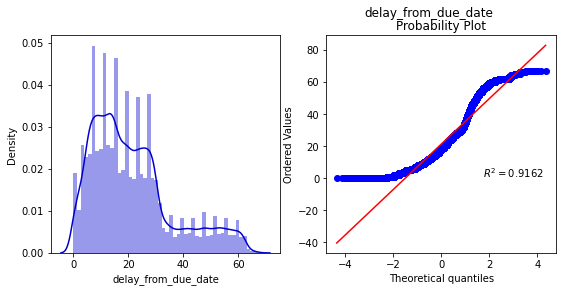

Skewness of num_credit_inquiries: 9.795833655787508
Kurtosis of num_credit_inquiries: 100.79510061365934


posx and posy should be finite values
posx and posy should be finite values


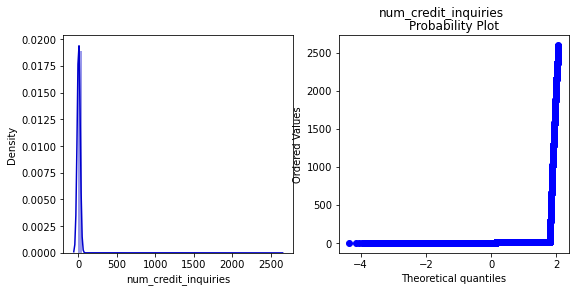

Skewness of credit_utilization_ratio: 0.02824152097518821
Kurtosis of credit_utilization_ratio: -0.9451947720878859


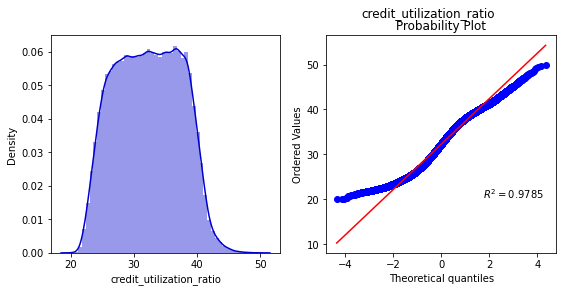

Skewness of total_emi_per_month: 7.09797645313809
Kurtosis of total_emi_per_month: 52.15856000355844


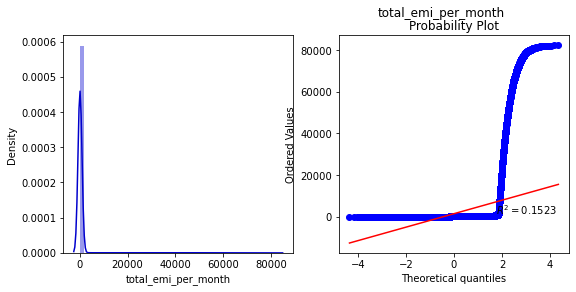

In [14]:
for col in train.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:", train[col].skew())
    print(f"Kurtosis of {col}:", train[col].kurtosis())
    
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(train[col], color='mediumblue')
    plt.subplot(132)
    probplot(train[col], rvalue=True, plot=plt, dist='norm')
    plt.suptitle(col)
    plt.show()

### Dealing with missing values

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
missing_values = ['name', 'monthly_inhand_salary', 'type_of_loan', 'num_of_delayed_payment', 
                  'num_credit_inquiries', 'credit_history_age', 'amount_invested_monthly', 'monthly_balance']

for col in missing_values:
    if train[col].dtypes == object:
        imputer = SimpleImputer(strategy = 'most_frequent')
        train[col] = imputer.fit_transform(train[[col]])
    
    else:
        imputer = IterativeImputer()
        train[col] = imputer.fit_transform(train[[col]])
    

In [17]:
train.isna().sum()

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

### Data Preprocessing

In [18]:
def text_clean(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [19]:
train = train.applymap(text_clean).replace(['', 'nan', '#F%$D@*&8', '!@9#%8'], np.nan)
train.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4184.712202,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4184.712202,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4184.712202,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,NaN,340.4792117872438,Good


In [20]:
train.isna().sum()

id                              0
customer_id                     0
month                           0
name                            0
age                             0
ssn                          5529
occupation                   7007
annual_income                   0
monthly_inhand_salary           0
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                    0
delay_from_due_date             0
num_of_delayed_payment          0
changed_credit_limit         2084
num_credit_inquiries            0
credit_mix                  20079
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age              0
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly         0
payment_behaviour            7551
monthly_balance                 0
credit_score                    0
dtype: int64

In [21]:
def month_convertor(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
        
        return (num1*12)+num2
    else:
        return x

In [22]:
train.num_of_delayed_payment = train.num_of_delayed_payment.apply(lambda x: re.search('\d+',x).group()).astype(np.int64)

train.num_of_loan = train.num_of_loan.apply(lambda x: re.search('\d+', x).group()).astype(np.int64)

train.outstanding_debt = train.outstanding_debt.apply(lambda x: re.search('\d+.\d+', x).group()).astype(np.float64)

train.annual_income = train.annual_income.apply(lambda x: re.search('\d+.\d+', str(x)).group()).astype(np.float64)

train.ssn = train.ssn.apply(lambda x: int(''.join(x.split('-'))) if pd.notna(x) else x).astype(np.float64)

train.id = train.id.apply(lambda x: int(x, 16)).astype(np.int64)

train.customer_id = train.customer_id.apply(lambda x: int(x[4:],16)).astype(np.int64)

train.credit_history_age = train.credit_history_age.apply(lambda x: month_convertor(x)).astype(np.float64)

train.type_of_loan = train.type_of_loan.apply(lambda x: x.lower().replace('and', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [23]:
train.month = pd.to_datetime(train.month, format = "%B").dt.month
train.month = train.month.astype(np.int64)

In [24]:
train.amount_invested_monthly = train.amount_invested_monthly.apply(lambda x: re.search('(\d+(?:\.\d+)?)', 
str(x)).group() if pd.notna(x) else x).astype(np.float64)

train.monthly_balance = train.monthly_balance.apply(lambda x: re.search('(\d+(?:\.\d+)?)', 
str(x)).group() if pd.notna(x) else x).astype(np.float64)

train.changed_credit_limit = train.changed_credit_limit.apply(lambda x: re.search('(\d+(?:\.\d+)?)',
str(x)).group() if pd.notna(x) else x).astype(np.float64)

In [25]:
train.age = train.age.apply(lambda x: re.search('\d+', x).group() if pd.notna(x) else x).astype(np.int64)
train[train.age <= 120].shape

(96631, 28)

### Categorical Values Encoding

In [26]:
null_values = ['ssn', 'occupation', 'changed_credit_limit', 'credit_mix', 
               'amount_invested_monthly', 'payment_behaviour', 'monthly_balance']

for col in null_values:
    if train[col].dtypes == object:
        imputer = SimpleImputer(strategy='most_frequent')
        train[col] = imputer.fit_transform(train[[col]])
        
    else:
        imputer = IterativeImputer()
        train[col] = imputer.fit_transform(train[[col]])
        

In [27]:
train.isna().sum()

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder

In [29]:
encode_credit_mix = OrdinalEncoder(categories=[['_', 'Bad', 'Standard', 'Good']])
train.credit_mix = encode_credit_mix.fit_transform(train[['credit_mix']])
train.credit_mix = train.credit_mix.astype(np.float64)
train.credit_mix

0        2.0
2        3.0
3        3.0
4        3.0
5        3.0
        ... 
99995    2.0
99996    2.0
99997    3.0
99998    3.0
99999    3.0
Name: credit_mix, Length: 99388, dtype: float64

In [30]:
encode_payment_of_min_amount = OrdinalEncoder(categories=[['NM', 'No', 'Yes']])
train.payment_of_min_amount = encode_payment_of_min_amount.fit_transform(train[['payment_of_min_amount']])
train.payment_of_min_amount = train.payment_of_min_amount.astype(np.float64)
train.payment_of_min_amount

0        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: payment_of_min_amount, Length: 99388, dtype: float64

In [31]:
encode_payment_behaviour = OrdinalEncoder(categories=[['Low_spent_Small_value_payments',
                                                       'High_spent_Medium_value_payments',
                                                       'Low_spent_Medium_value_payments',
                                                       'High_spent_Large_value_payments',
                                                       'High_spent_Small_value_payments',
                                                       'Low_spent_Large_value_payments']])
train.payment_behaviour = encode_payment_behaviour.fit_transform(train[['payment_behaviour']])
train.payment_behaviour = train.payment_behaviour.astype(np.float64)
train.payment_behaviour

0        4.0
2        2.0
3        0.0
4        1.0
5        0.0
        ... 
99995    3.0
99996    1.0
99997    3.0
99998    5.0
99999    0.0
Name: payment_behaviour, Length: 99388, dtype: float64

In [32]:
train.credit_mix = train.credit_mix.astype(np.float64)
train.payment_behaviour = train.payment_behaviour.astype(np.float64)
train.payment_of_min_amount = train.payment_of_min_amount.astype(np.float64)

In [33]:
train.occupation.unique()

array(['Scientist', 'Lawyer', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [34]:
encode_occupation = pd.get_dummies(train.occupation, drop_first=True, sparse=False, dtype=np.int64)
train = pd.concat([train, encode_occupation], axis=1)
train.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,0,0,0,0,0,0,0,1,0,0
2,5636,3392,3,Aaron Maashoh,500,821000265.0,Scientist,19114.12,4184.712202,3,...,0,0,0,0,0,0,0,1,0,0
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,4184.712202,3,...,0,0,0,0,0,0,0,1,0,0
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,0,0,0,0,0,0,0,1,0,0
5,5639,3392,6,Aaron Maashoh,23,821000265.0,Scientist,19114.12,4184.712202,3,...,0,0,0,0,0,0,0,1,0,0


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99388 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        99388 non-null  int64  
 1   customer_id               99388 non-null  int64  
 2   month                     99388 non-null  int64  
 3   name                      99388 non-null  object 
 4   age                       99388 non-null  int64  
 5   ssn                       99388 non-null  float64
 6   occupation                99388 non-null  object 
 7   annual_income             99388 non-null  float64
 8   monthly_inhand_salary     99388 non-null  float64
 9   num_bank_accounts         99388 non-null  int64  
 10  num_credit_card           99388 non-null  int64  
 11  interest_rate             99388 non-null  int64  
 12  num_of_loan               99388 non-null  int64  
 13  type_of_loan              99388 non-null  object 
 14  delay_

#### Dropping Object Type Features

In [36]:
train.drop('occupation', axis=1, inplace=True)

In [37]:
train.drop('name', axis=1, inplace=True)

In [38]:
counts = train.type_of_loan.value_counts()

In [39]:
threshold = 1000
remaining_categories = counts[counts <= threshold].index
loan_type_encoded = pd.get_dummies(train.type_of_loan.replace(remaining_categories, 'loan_type'), dtype=np.int64)
loan_type_encoded

,auto loan,credit-builder loan,debt consolidation loan,home equity loan,loan_type,mortgage loan,not specified,payday loan,personal loan,student loan
0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,1,0,0,0,0,0
99996,0,0,0,0,1,0,0,0,0,0
99997,0,0,0,0,1,0,0,0,0,0
99998,0,0,0,0,1,0,0,0,0,0


In [40]:
train = pd.concat([train, loan_type_encoded], axis=1)
train.head()

,id,customer_id,month,age,ssn,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,auto loan,credit-builder loan,debt consolidation loan,home equity loan,loan_type,mortgage loan,not specified,payday loan,personal loan,student loan
0,5634,3392,1,23,821000265.0,19114.12,1824.843333,3,4,3,...,0,0,0,0,1,0,0,0,0,0
2,5636,3392,3,500,821000265.0,19114.12,4184.712202,3,4,3,...,0,0,0,0,1,0,0,0,0,0
3,5637,3392,4,23,821000265.0,19114.12,4184.712202,3,4,3,...,0,0,0,0,1,0,0,0,0,0
4,5638,3392,5,23,821000265.0,19114.12,1824.843333,3,4,3,...,0,0,0,0,1,0,0,0,0,0
5,5639,3392,6,23,821000265.0,19114.12,4184.712202,3,4,3,...,0,0,0,0,1,0,0,0,0,0


In [41]:
train.drop('type_of_loan', axis=1, inplace=True)

### Feature Splitting

In [42]:
X = train.drop('credit_score', axis=1)
y = train.credit_score

#### Balancing out the imbalanced classes using the SMOTE technique

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [45]:
y.value_counts()

Good        52955
Standard    52955
Poor        52955
Name: credit_score, dtype: int64

### Creating Test and Train Data

In [46]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    ixs = np.arange(X.shape[0])
    
    if random_state:
        np.random.seed(random_state)
    np.random.shuffle(ixs)
    
    t_size = int(X.shape[0]*test_size)
    test_ixs = ixs[:t_size]
    train_ixs = ixs[t_size:]
    X_train = X.iloc[train_ixs]
    X_test = X.iloc[test_ixs]
    y_train = y.iloc[train_ixs]
    y_test = y.iloc[test_ixs]
    return X_train, X_test, y_train, y_test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [48]:
X_train.shape

(127092, 48)

In [49]:
y_train.shape

(127092,)

In [50]:
X_test.shape

(31773, 48)

In [51]:
y_test.shape

(31773,)

### Feature Selection

In [52]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.ensemble import RandomForestClassifier

In [53]:
skbest = SelectKBest(k=12, score_func=f_classif)
skbest.fit(X_train, y_train)

SelectKBest(k=12)

In [54]:
select_features = skbest.get_feature_names_out()
select_features

array(['monthly_inhand_salary', 'delay_from_due_date',
       'changed_credit_limit', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'payment_behaviour', 'Lawyer',
       'loan_type', 'not specified'], dtype=object)

In [55]:
percentile = SelectPercentile(percentile=20, score_func=f_classif)
percentile.fit(X_train, y_train)

SelectPercentile(percentile=20)

In [56]:
select_features = percentile.get_feature_names_out()
select_features

array(['monthly_inhand_salary', 'delay_from_due_date',
       'changed_credit_limit', 'credit_mix', 'outstanding_debt',
       'credit_history_age', 'payment_of_min_amount', 'payment_behaviour',
       'loan_type', 'not specified'], dtype=object)

In [57]:
select_from_model = SelectFromModel(estimator=RandomForestClassifier(), max_features=12, threshold='1.25*mean')
select_from_model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=12,
                threshold='1.25*mean')

In [58]:
select_features = select_from_model.get_feature_names_out()
select_features

array(['id', 'num_bank_accounts', 'num_credit_card', 'interest_rate',
       'delay_from_due_date', 'num_of_delayed_payment',
       'changed_credit_limit', 'num_credit_inquiries', 'credit_mix',
       'outstanding_debt', 'credit_history_age', 'payment_of_min_amount'],
      dtype=object)

In [59]:
selected_feature = ['annual_income','monthly_inhand_salary', 
                    'num_credit_card','interest_rate', 'delay_from_due_date',
                    'num_of_delayed_payment', 'changed_credit_limit',
                    'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
                    'credit_history_age','payment_of_min_amount', 'total_emi_per_month',
                    'payment_behaviour', 'monthly_balance',
                    'loan_type']

X_train_tr = X_train[selected_feature]
X_test_tr = X_test[selected_feature]

#### Feature Scaling and Normalization

In [60]:
scale = StandardScaler()
features = X_train_tr.columns

X_train_tr = scale.fit_transform(X_train_tr)
X_train_tr = pd.DataFrame(X_train_tr, columns=features)

X_test_tr = scale.fit_transform(X_test_tr)
X_test_tr = pd.DataFrame(X_test_tr, columns=features)

X_train_tr.head()

,annual_income,monthly_inhand_salary,num_credit_card,interest_rate,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_history_age,payment_of_min_amount,total_emi_per_month,payment_behaviour,monthly_balance,loan_type
0,-0.108911,-0.926878,-0.139642,-0.144117,-0.348397,-0.058356,-0.130808,-0.144836,-0.199070,-0.908669,-0.264114,-0.511231,-0.167785,-1.140167,-0.114512,0.577265
1,-0.076296,0.237168,-0.097535,-0.093658,-0.013603,-0.037521,-0.254771,-0.093206,-1.097843,0.461526,-0.511635,1.005245,-0.164991,-0.901278,-0.114512,0.577265
2,-0.116562,-1.302672,1.233051,-0.121181,0.455109,-0.063564,0.890547,-0.075996,-0.199070,0.603054,-0.357783,1.005245,-0.170782,1.546418,-0.114512,0.577265
3,-0.110035,-0.998452,-0.131220,-0.144117,-0.884068,-0.042730,-1.033950,-0.133363,-0.199070,-1.052325,0.354059,-2.027707,-0.167221,-0.524740,-0.114512,0.577265
4,-0.042749,1.539292,-0.139642,-0.121181,0.053356,-0.068773,-0.028357,-0.104680,-0.199070,-0.083822,-1.074133,1.005245,-0.139830,-1.140167,-0.114512,0.577265


#### Target Label Encoding

In [61]:
def get_integer_mapping(ctg):
    
    res = {}
    for cl in ctg.classes_:
        res.update({cl:ctg.transform([cl])[0]})
    return res    

In [62]:
encode = LabelEncoder()
y_train_tr = encode.fit_transform(y_train)
y_test_tr = encode.fit_transform(y_test)

In [63]:
label = get_integer_mapping(encode)
label

{'Good': 0, 'Poor': 1, 'Standard': 2}

### Baseline Models Performance Comparison

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [65]:
def rmse(y, y_hat):
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)

### Model Training & Evaluation

In [66]:
models = []
accuracy = []
precision = []
recall = []
f1_sc = []

In [67]:
def train_model(model):
    model.fit(X_train_tr, y_train_tr)
    y_pred = model.predict(X_test_tr)
    print(classification_report(y_test_tr, y_pred))
    
    acc = accuracy_score(y_test_tr, y_pred)
    pre = precision_score(y_test_tr, y_pred, average='micro')
    rec = recall_score(y_test_tr, y_pred, average='micro')
    f1  = f1_score(y_test_tr, y_pred, average='micro')
    ConfusionMatrixDisplay.from_predictions(y_test_tr, y_pred)
    
    models.append(model)
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    f1_sc.append(f1)

              precision    recall  f1-score   support

           0       0.69      0.79      0.74     10626
           1       0.70      0.66      0.68     10541
           2       0.59      0.55      0.57     10606

    accuracy                           0.66     31773
   macro avg       0.66      0.66      0.66     31773
weighted avg       0.66      0.66      0.66     31773



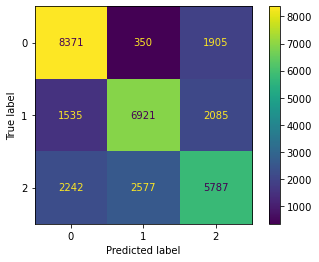

In [68]:
train_model(LogisticRegression())

              precision    recall  f1-score   support

           0       0.74      0.82      0.78     10626
           1       0.47      0.88      0.61     10541
           2       0.62      0.00      0.01     10606

    accuracy                           0.57     31773
   macro avg       0.61      0.57      0.47     31773
weighted avg       0.61      0.57      0.47     31773



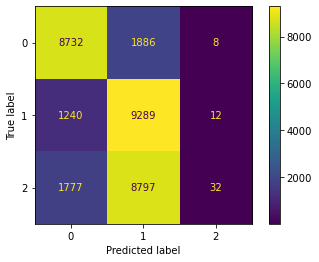

In [69]:
train_model(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.65      0.95      0.77     10626
           1       0.65      0.87      0.75     10541
           2       0.87      0.16      0.27     10606

    accuracy                           0.66     31773
   macro avg       0.72      0.66      0.60     31773
weighted avg       0.72      0.66      0.60     31773



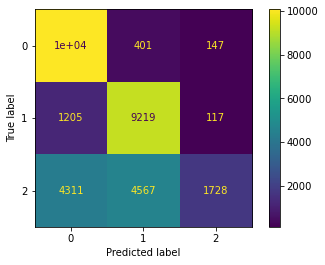

In [70]:
train_model(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.58      0.95      0.72     10626
           1       0.68      0.84      0.75     10541
           2       0.77      0.10      0.18     10606

    accuracy                           0.63     31773
   macro avg       0.68      0.63      0.55     31773
weighted avg       0.68      0.63      0.55     31773



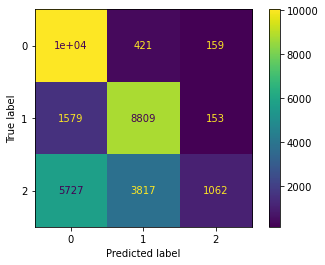

In [71]:
train_model(HistGradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.71      0.84      0.77     10626
           1       0.74      0.73      0.74     10541
           2       0.67      0.56      0.61     10606

    accuracy                           0.71     31773
   macro avg       0.71      0.71      0.71     31773
weighted avg       0.71      0.71      0.71     31773



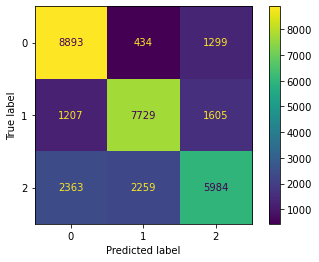

In [73]:
train_model(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10626
           1       0.83      0.85      0.84     10541
           2       0.85      0.69      0.76     10606

    accuracy                           0.82     31773
   macro avg       0.83      0.82      0.82     31773
weighted avg       0.83      0.82      0.82     31773



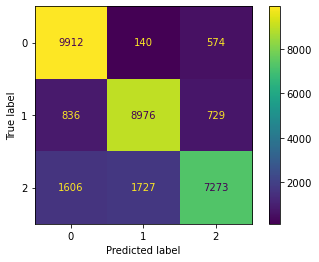

In [74]:
train_model(ExtraTreesClassifier())

              precision    recall  f1-score   support

           0       0.65      0.81      0.72     10626
           1       0.55      0.79      0.65     10541
           2       0.62      0.19      0.29     10606

    accuracy                           0.60     31773
   macro avg       0.61      0.60      0.55     31773
weighted avg       0.61      0.60      0.55     31773



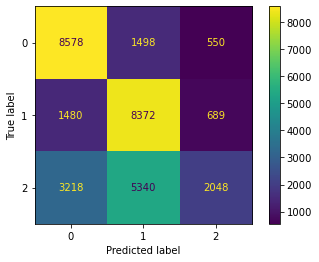

In [75]:
train_model(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     10626
           1       0.71      0.84      0.77     10541
           2       0.85      0.17      0.29     10606

    accuracy                           0.66     31773
   macro avg       0.72      0.66      0.60     31773
weighted avg       0.72      0.66      0.60     31773



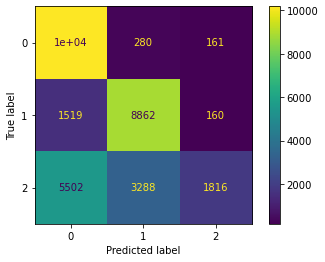

In [76]:
train_model(VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('KN', KNeighborsClassifier()), 
                                         ('HIST', HistGradientBoostingClassifier())], voting='hard'))

### Optimized Models Performance Comparision

In [77]:
df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 
                   'Recall': recall, 'F1 Score': f1_sc}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

In [78]:
df

,Model,Accuracy,Precision,Recall,F1 Score
0,"(ExtraTreeClassifier(random_state=292573945), ...",0.823372,0.823372,0.823372,0.823372
1,KNeighborsClassifier(),0.711485,0.711485,0.711485,0.711485
2,LogisticRegression(),0.663425,0.663425,0.663425,0.663425
3,"(DecisionTreeClassifier(max_features='auto', r...",0.661725,0.661725,0.661725,0.661725
4,"VotingClassifier(estimators=[('RF', RandomFore...",0.656627,0.656627,0.656627,0.656627
5,HistGradientBoostingClassifier(),0.626853,0.626853,0.626853,0.626853
6,DecisionTreeClassifier(),0.597929,0.597929,0.597929,0.597929
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.568187,0.568187,0.568187,0.568187
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.568187,0.568187,0.568187,0.568187


In [79]:
score = cross_val_score(estimator=ExtraTreesClassifier(), X=X_test_tr, y=y_test_tr, scoring='accuracy', cv=5)
print(" Average of Cross Validation Accuracy :", round(np.mean(score),2))

 Average of Cross Validation Accuracy : 0.78


In [80]:
Ext = ExtraTreesClassifier()
Ext.fit(X_train_tr, y_train_tr)

ExtraTreesClassifier()

In [81]:
print("Accuracy of ExtraTreesClassifier:", accuracy_score(y_test_tr, Ext.predict(X_test_tr)))

Accuracy of ExtraTreesClassifier: 0.8241903502974224
